In [1]:
import os
os.chdir('/home/conaire')
#os.environ["XLA_FLAGS"]= '--xla_gpu_cuda_data_dir=/miniconda3/envs/Toliman-GPU/lib/python3.10/site-packages/'
#os.environ["XLA_FLAGS"]='--xla_gpu_strict_conv_algorithm_picker=false'
os.environ["JAX_PLATFORM_NAME"] = 'cpu'
import warnings
warnings.filterwarnings("ignore")
from importlib import reload

import jax; jax = reload(jax)
import jaxlib
import jax.numpy as np
import jax.lax as jl
import jax.random as jr
from jax.config import config
#config.update("jax_enable_x64", True)

import toliman; toliman = reload(toliman)
import toliman.constants as const;  toliman.constants = reload(toliman.constants)
import toliman.math as math
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm
import dLux; dLux = reload(dLux)
import optax; optax = reload(optax)
import equinox; equinox = reload(equinox)
#TF_CPP_MIN_LOG_LEVEL=0

print(jax.local_devices())
jax.default_backend()

dLux: Jax is running in 32-bit, to enable 64-bit visit:
https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#double-64bit-precision
dLux: Jax is running in 32-bit, to enable 64-bit visit:
https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#double-64bit-precision
[CpuDevice(id=0)]


'cpu'

In [2]:
os.environ["DEFAULT_MASK_DIR"]

'.assets/mask.npy'

In [3]:
model: object = dLux.Instrument(
    optics = toliman.TolimanOptics(operate_in_static_mode = True, pixels_on_detector = 1024, pixels_in_pupil = 1024,
                                   grating_amplitude = 2e-7, pixel_size =  dLux.utils.arcseconds_to_radians(0.3)),
    # optics = toliman.TolimanOptics(operate_in_static_mode = True),
    detector = toliman.TolimanDetector(simulate_pixel_response = False),
    sources = [toliman.AlphaCentauri()]
)

.assets/mask.npy
3.1415928e-07
0.0008799186
Grating is sampled as 3.47x Nyquist


3.1415928e-07


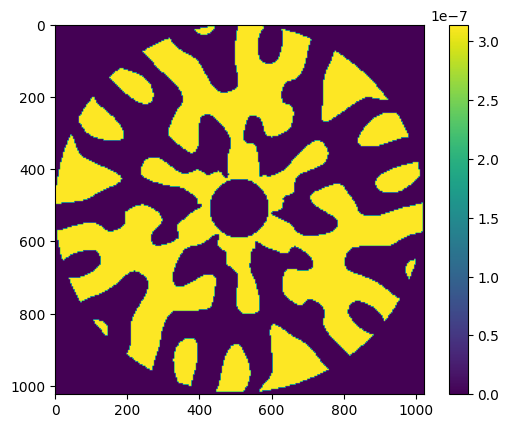

In [4]:
twe = np.load('miniconda3/envs/Toliman-GPU/lib/python3.10/site-packages/toliman/assets/mask.npy')
# twe = np.round((twe*1e7)/np.pi)*1e-7
plt.imshow(twe)
print(np.max(twe))
plt.colorbar()

In [5]:
testsd = np.load('test-mask-ignore.npy')
print(np.max(testsd))

4.1415026e-07


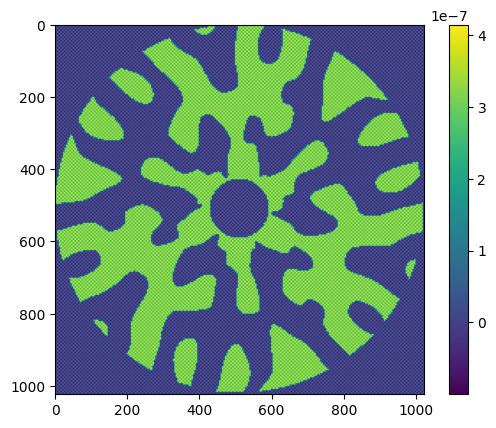

In [6]:
plt.imshow(testsd)
plt.colorbar()

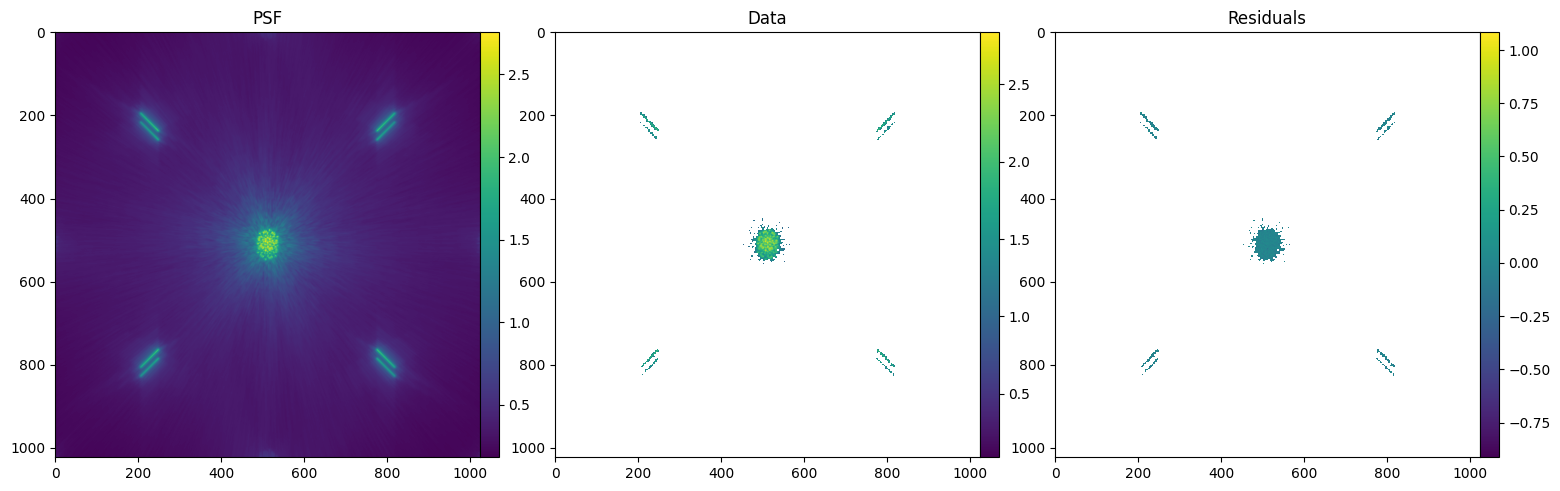

In [7]:
psf: float = model.model()
data: float = math.simulate_data(psf, 1)

def im_and_cbar(figure: object, image: float, pos: int, title: str, naxes: int) -> object:
    cbar_pad: float = 0.05
    cbar_width: float = 0.0125
    width: float = 1.0 / naxes - cbar_pad
    disp: float = cbar_pad / 2.0 * naxes
    height: float = 1.0 - 2.0 * disp
    corner: float = float(pos) / float(naxes)
    im_ax: object = figure.add_axes([corner, disp, width, height])
    cbar_ax: object = figure.add_axes([corner + width, disp, cbar_width, height])
    im_cmap: object = im_ax.imshow(image)
    im_cbar: object = figure.colorbar(im_cmap, cax = cbar_ax)
    #im_xticks: object = im_ax.axis("off")
    im_title: object = im_ax.set_title(title) 
    return figure

scale: float = 5.0
naxes: int = 3
figure: object = plt.figure(figsize = (naxes * scale, scale))
figure: object = im_and_cbar(figure, psf**0.2, 1, "PSF", 3)
figure: object = im_and_cbar(figure, data**0.2, 2, "Data", 3)
figure: object = im_and_cbar(figure, data**0.2 - psf**0.2, 3, "Residuals", 3)

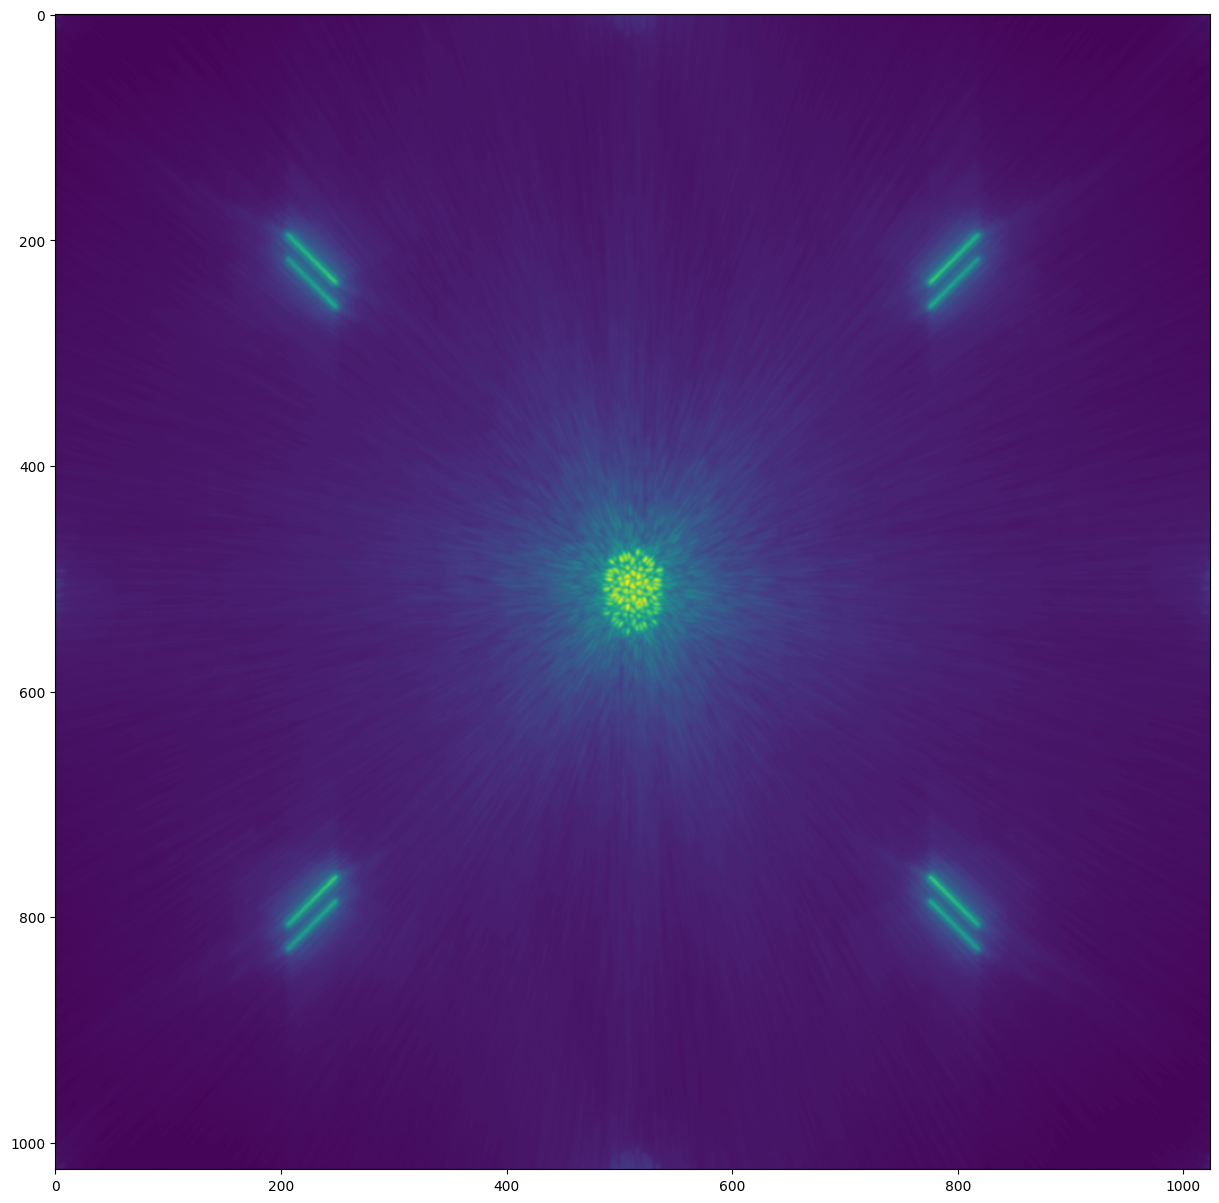

In [8]:
plt.figure(figsize = (15,15))
plt.imshow(psf**0.2)